# Predicting turbine energy yield (TEY) using ambient variables as features.**

**Load data and libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


!pip install ppscore
import ppscore as PPS

# Importing the necessary packages for Neural Networks
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')               #to use GPU for faster processing of model

In [116]:
#Load the data
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [117]:
df.shape

(15039, 11)

In [118]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [120]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


**EDA & Feature Engineering**

In [121]:
#check for misssing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [122]:
df.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [123]:
#check for duplicate values
df[df.duplicated()].shape

(0, 11)

In [124]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [125]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [126]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

Observation:
- No missing values
- No duplicate values
- All dtypes are correct.

## **Data Visualisation**

<Axes: title={'center': 'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

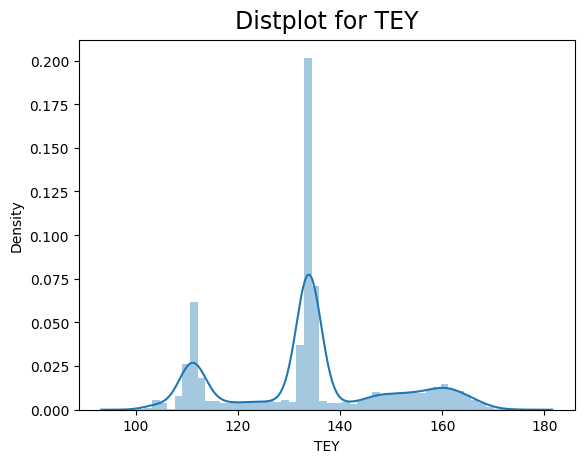

In [127]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

<Axes: title={'center': 'Distplot for AT'}, xlabel='AT', ylabel='Density'>

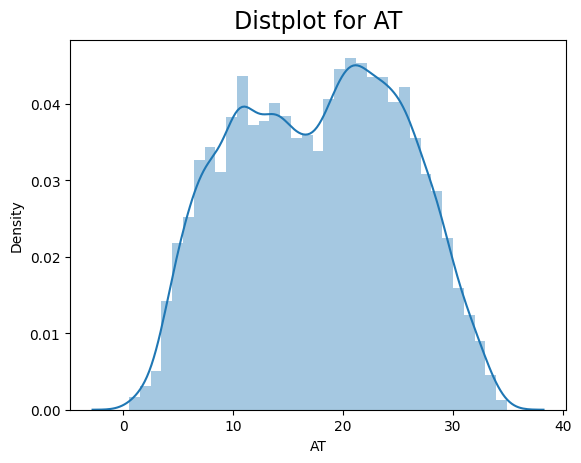

In [128]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

<Axes: title={'center': 'Distplot for AP'}, xlabel='AP', ylabel='Density'>

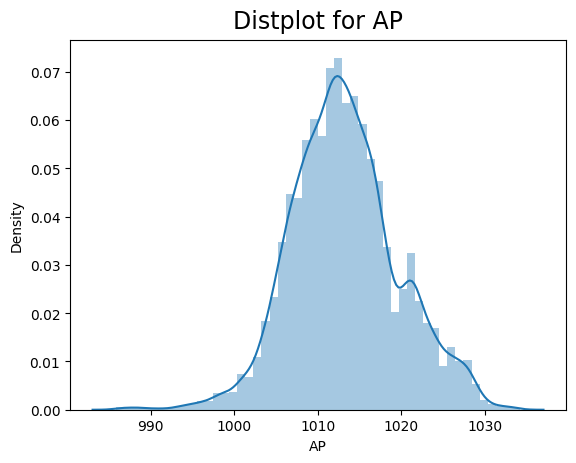

In [129]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

<Axes: title={'center': 'Distplot for AH'}, xlabel='AH', ylabel='Density'>

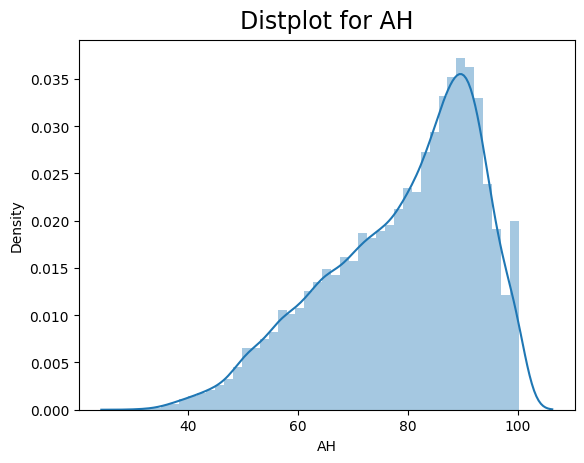

In [130]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

<Axes: title={'center': 'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

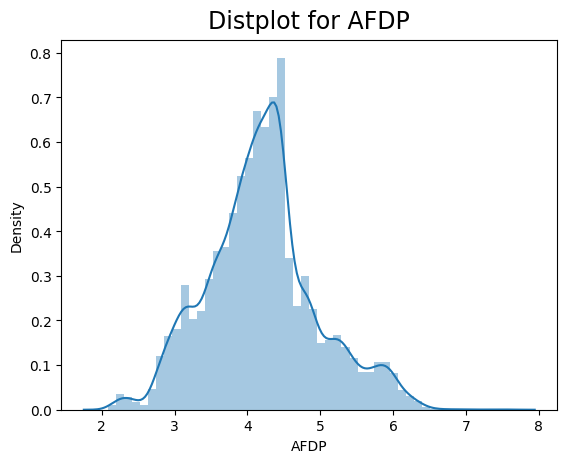

In [131]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

<Axes: title={'center': 'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

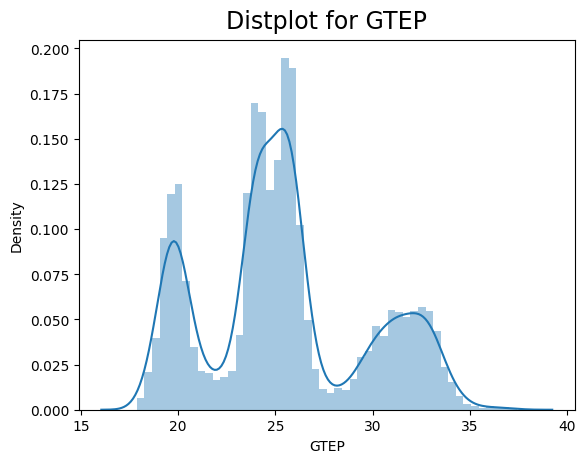

In [132]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

<Axes: title={'center': 'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

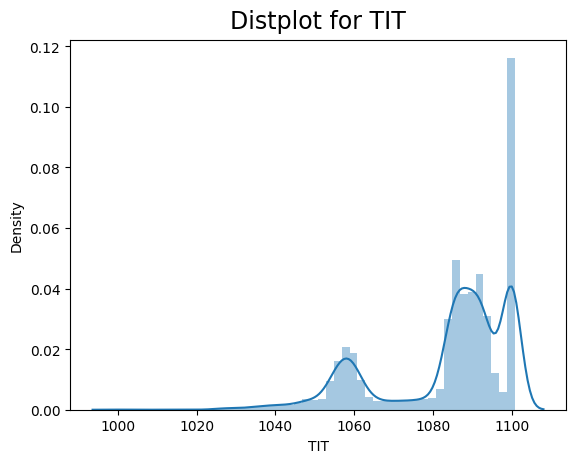

In [133]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

<Axes: title={'center': 'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

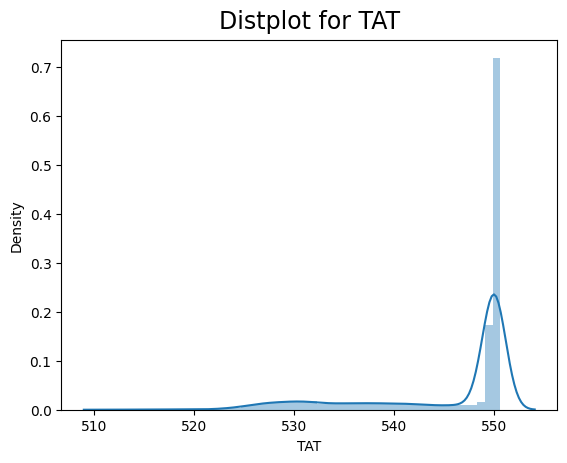

In [134]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

<Axes: title={'center': 'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

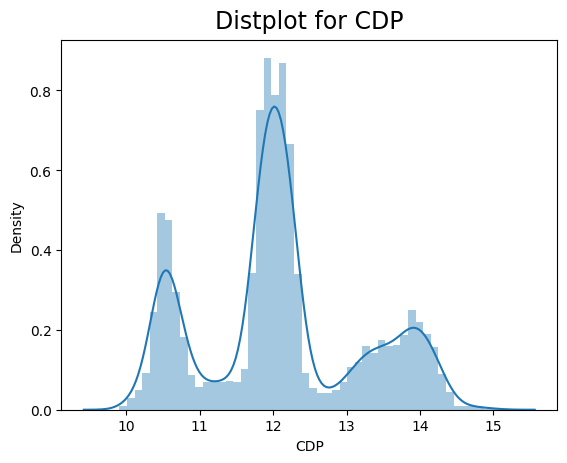

In [135]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

<Axes: title={'center': 'Distplot for CO'}, xlabel='CO', ylabel='Density'>

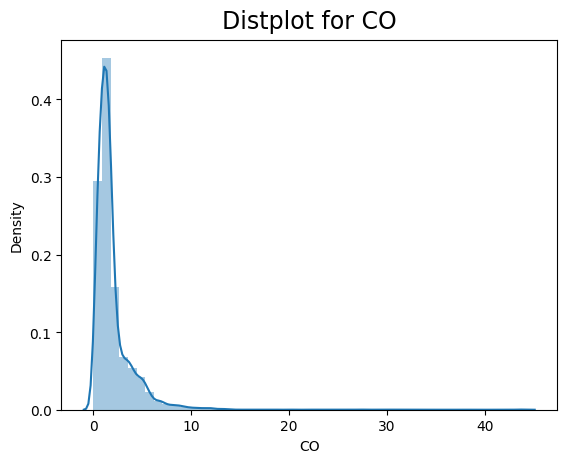

In [136]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

<Axes: title={'center': 'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

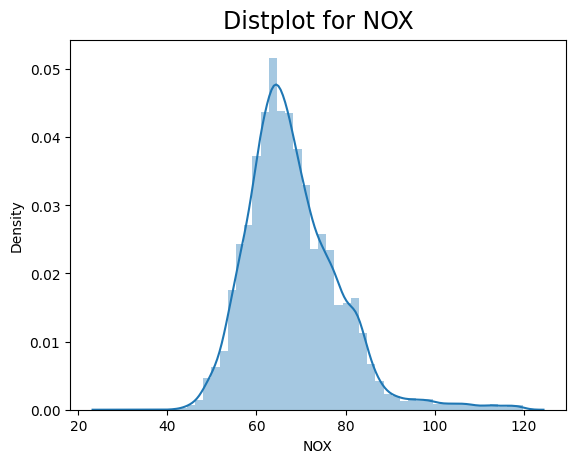

In [138]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

## Finding Corelations

In [139]:
data = df.corr().iloc[:,7]
data

AT     -0.207495
AP      0.146939
AH     -0.110272
AFDP    0.717995
GTEP    0.977042
TIT     0.891587
TAT    -0.720356
TEY     1.000000
CDP     0.988473
CO     -0.541751
NOX    -0.102631
Name: TEY, dtype: float64

In [140]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


<Axes: title={'center': 'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

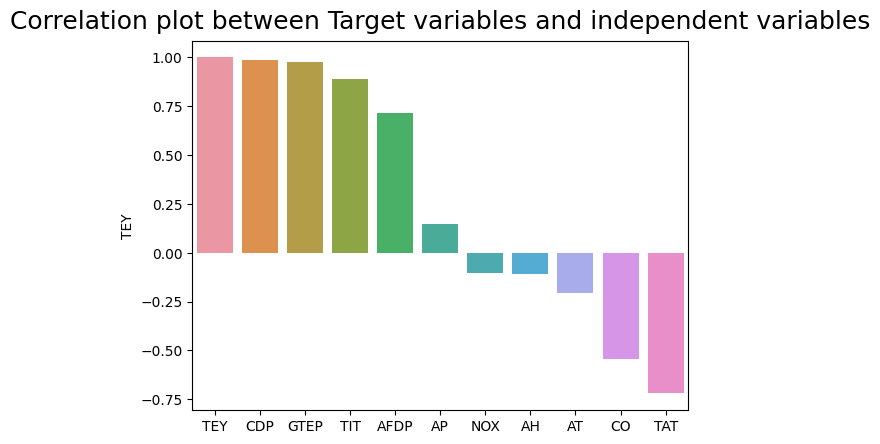

In [141]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

In [142]:
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

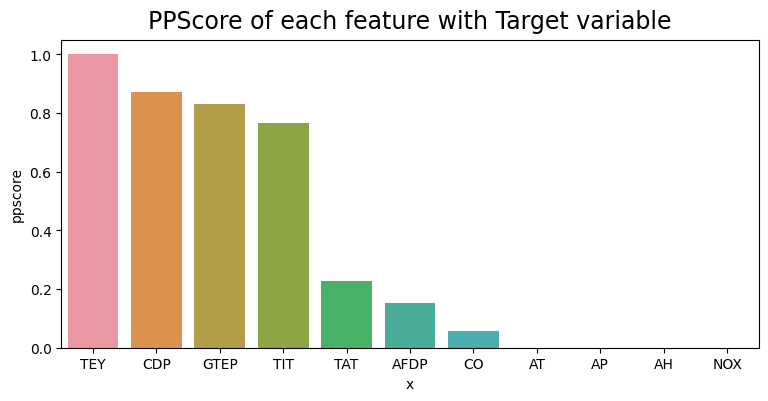

In [145]:
plt.rcParams['figure.figsize']=(9,4)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

**Observation:**
- From correlation data as well as ppscore we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.
- We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.

# **Data Preprocessing**

In [146]:
df.shape

(15039, 11)

In [147]:
# Drop the columns which do not impact the target variable
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [148]:
df.shape

(15039, 7)

# **Converting independent features into normalised and standardized data**

In [149]:
#Standardize the data
std = StandardScaler()
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)            #data between -1 to +1

In [150]:
temp_s= df_std

**Splitting data into target variable and independent variables**

In [151]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179
...,...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683


# **Creating train and test data for model validation** **bold text**

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [153]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11279, 6), (3760, 6), (11279,), (3760,))

# Build a Model

In [194]:
model1 = Sequential()
model1.add(Dense(6, input_dim=6, activation='relu'))
model1.add(Dense(6,  activation='relu'))
model1.add(Dense(1,activation='linear'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [195]:
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 6)                 42        
                                                                 
 dense_53 (Dense)            (None, 6)                 42        
                                                                 
 dense_54 (Dense)            (None, 1)                 7         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [196]:
epochs=500
history=  model1.fit(x_train,y_train, epochs = epochs,validation_split=0.33)#, shuffle=True)
scores = model1.evaluate(x_train,y_train)
scores
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

Epoch 1/500
237/237 [==============================] - 1s 2ms/step - loss: 0.6149 - accuracy: 0.0000e+00 - val_loss: 0.4480 - val_accuracy: 0.0000e+00
Epoch 2/500
237/237 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.0000e+00 - val_loss: 0.3476 - val_accuracy: 0.0000e+00
Epoch 3/500
237/237 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.0000e+00 - val_loss: 0.2592 - val_accuracy: 0.0000e+00
Epoch 4/500
237/237 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.0000e+00 - val_loss: 0.1893 - val_accuracy: 0.0000e+00
Epoch 5/500
237/237 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.0000e+00 - val_loss: 0.1401 - val_accuracy: 0.0000e+00
Epoch 6/500
237/237 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.0000e+00 - val_loss: 0.1049 - val_accuracy: 0.0000e+00
Epoch 7/500
237/237 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 

In [197]:

print("Predicted values:")
y_pred= model1.predict(x_test)
y_pred[:10]

Predicted values:
118/118 [==============================] - 0s 856us/step


array([[ 2.0749645 ],
       [ 1.7816193 ],
       [ 1.6337739 ],
       [ 0.27485323],
       [ 1.5447066 ],
       [-0.05238247],
       [ 0.00746226],
       [-1.4158528 ],
       [-0.00877452],
       [ 0.03950691]], dtype=float32)

In [198]:
print('Actual values')
y_test[:10]

Actual values


7234     2.237103
557      1.768349
9568     1.639473
12918    0.177617
367      1.585775
9942    -0.018855
13357   -0.053601
599     -1.483238
9215    -0.032754
5747    -0.010643
Name: TEY, dtype: float64

# Printing the R2 score

In [199]:
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.9934534912969001

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


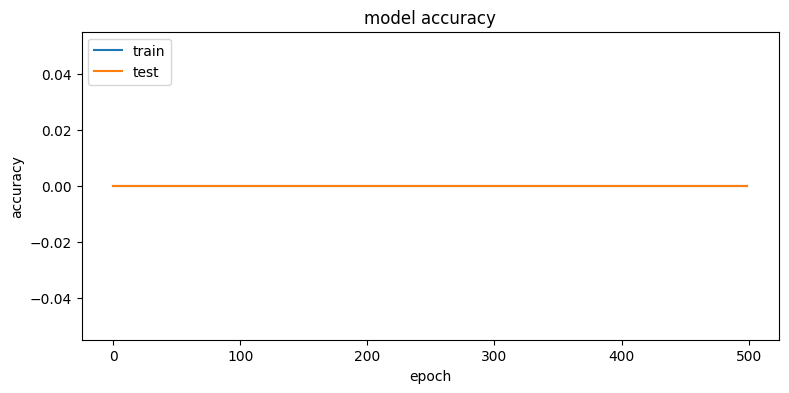

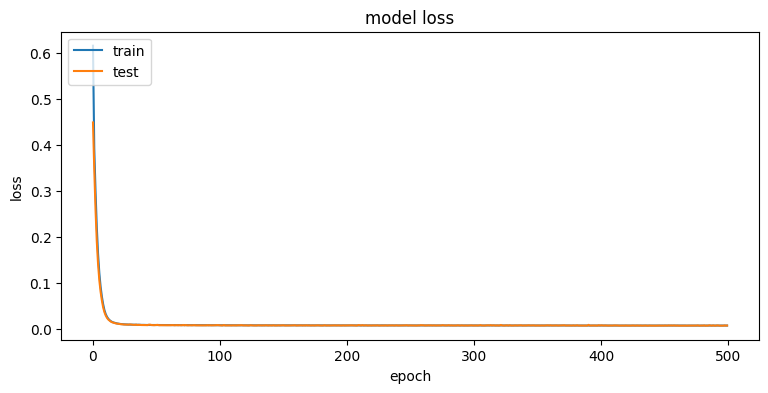

In [200]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**

- We got pretty good results for this model.
- Train and test errors are also quiet similar, which means our model is not overfitted or underfitted.